# Gradient Descent (GD)

## Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Gradient Descent (GD)

<div class="alert alert-block alert-info">
    
The **Gradient Descent (GD) algorithm** is given as follows:

<img src="files/figures/GD.png" width="650px"/>

</div>

Consider the surface given by

$$
z = f(x, y) = \sin(5x) \cdot \cos(5y).
$$

This surface is represented in the 2 plots below (the surface itself and the contour plot).

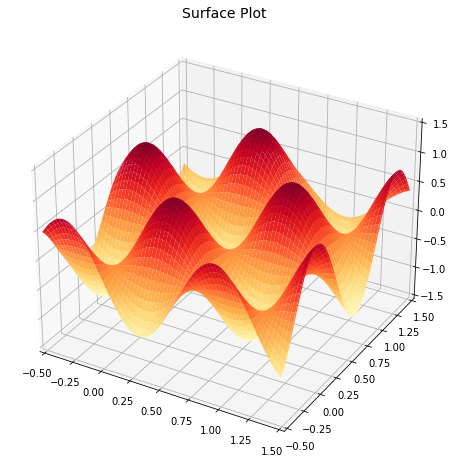

In [9]:
x = np.arange(-0.5, 1.5, 0.01)
y = np.arange(-0.5, 1.5, 0.01)

X, Y = np.meshgrid(x, y)
Z = np.sin(5*X)*np.cos(5*Y)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection= '3d')
surf = ax.plot_surface(X, Y, Z, 
                       cmap='YlOrRd', 
                       linewidth=0, 
                       antialiased='True', 
                       rstride=3, 
                       cstride=3)

ax.set_xlim([-0.5, 1.5])
ax.set_ylim([-0.5, 1.5])
ax.set_zlim([-1.5, 1.5])
plt.title("Surface Plot", size=14)

plt.show()

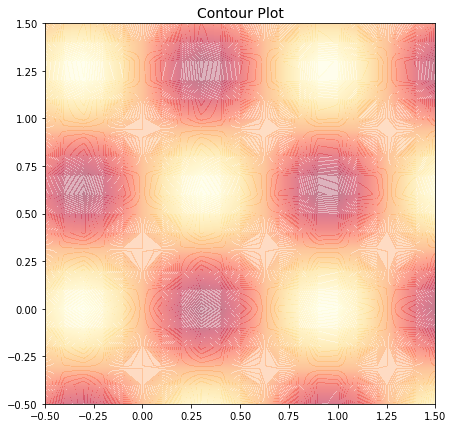

In [10]:
x = np.arange(-0.5, 1.6, 0.1)
y = np.arange(-0.5, 1.6, 0.1)

X, Y = np.meshgrid(x, y)
Z = np.sin(5*X) * np.cos(5*Y)


fig = plt.figure(figsize=(7, 7))

ax = fig.add_subplot(111)
ax.contourf(X, Y, Z, 100, cmap='YlOrRd', alpha=0.3)

ax.set_xlim([-0.5, 1.5])
ax.set_ylim([-0.5, 1.5])
plt.title("Contour Plot", size=14)

plt.show()

- Create a function `gradient_f(x, y)` that computes the gradient of $f$ at point $(x, y)$.
- In the contour plot, plot the vector field of the gradients (use `plt.quiver(...)`).
- Create a function `GD_f(lamda, epsilon)` that implements a **gradient descent (GD) algorithm** for $f$:<br>
The function returns the list of points encountered during the GD; `lamda` is the learning rate.<br>
Run the function with `lamda=0.01` and `epsilon=0.1`.
- In the contour plot, plot the sucessive points obtained by your GD.

In [11]:
def gradient_f(x, y):
    """
    Gradient of f at (x, y). 
    The function is numpy broadcastable.
    """
    
    nabla_x = 5*np.cos(5*x) * np.cos(5*x)
    nabla_y = -np.sin(5*x) * 5*np.sin(5*y)
    
    return nabla_x, nabla_y

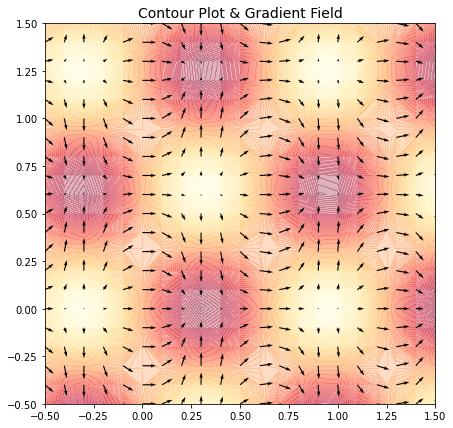

In [5]:
x = np.arange(-0.5, 1.6, 0.1)
y = np.arange(-0.5, 1.6, 0.1)

X, Y = np.meshgrid(x, y)
Z = np.sin(5*X) * np.cos(5*Y)

# gradients
Nabla = gradient_f(X, Y)
Nabla_x = Nabla[0]
Nabla_y = Nabla[1]

fig = plt.figure(figsize=(7, 7))

ax = fig.add_subplot(111)
ax.contourf(X, Y, Z, 100, cmap='YlOrRd', alpha=0.3) # contour plot
ax.quiver(X , Y, Nabla_x, Nabla_y) # gradient field

ax.set_xlim([-0.5, 1.5])
ax.set_ylim([-0.5, 1.5])
plt.title("Contour Plot & Gradient Field", size=14)

plt.show()

In [6]:
def GD_f(lamda, epsilon):
    """
    Gradient descent for f with learning rate lamda and tolerance tol.
    """
    
    x, y = np.random.uniform(-0.5, 1.5, 2) # initial point (random)
    point = np.array([x, y])
    GD_points = [point]
        
    gradient = np.array([100, 100]) # fictive high gradient
    
    while np.linalg.norm(gradient) > epsilon:
        
        gradient = np.array(gradient_f(point[0], point[1]))
        point = point - lamda * gradient
        GD_points.append(point)
    
    return GD_points

In [7]:
GD_points = GD_f(0.01, 0.1)

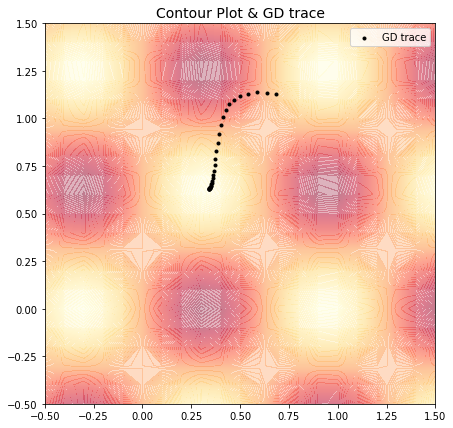

In [8]:
x = np.arange(-0.5, 1.6, 0.1)
y = np.arange(-0.5, 1.6, 0.1)

X, Y = np.meshgrid(x, y)
Z = np.sin(5*X) * np.cos(5*Y)

GD_x = [p[0] for p in GD_points]
GD_y = [p[1] for p in GD_points]

fig = plt.figure(figsize=(7, 7))

ax = fig.add_subplot(111)
ax.contourf(X, Y, Z, 100, cmap='YlOrRd', alpha=0.3)
ax.scatter(GD_x, GD_y, marker='.', color='black', label='GD trace')

ax.set_xlim([-0.5, 1.5])
ax.set_ylim([-0.5, 1.5])
plt.title("Contour Plot & GD trace", size=14)
plt.legend()

plt.show()

We see that the points converge towards a minimum of f (center of yellow region).